In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_csv("customer_behavior_dataset.csv")

In [4]:
data.head()

,age,income,spending_score,account_balance,transaction_count,credit_score,loyalty_score,online_activity,customer_service_calls,last_purchase_amount,...,complaints_count,returns_count,product_views,cart_abandonment_rate,average_purchase_value,days_since_last_purchase,email_open_rate,promotion_response_rate,referral_count,target
0,59,105879,26,85153,21,767,-1.538543,-1.883179,-2.330355,-1.165696,...,-0.178432,-1.390825,-1.383293,1.517988,1.834143,-1.329279,-1.148123,0.956687,-0.255628,4
1,26,38267,85,83121,343,695,-4.248828,1.072389,-3.321508,0.169992,...,0.608700,0.882377,0.898631,-1.555704,-1.707316,1.308104,-0.585065,-1.491261,-0.257458,3
2,25,116024,53,14555,252,310,-4.756533,0.983289,0.672563,0.796807,...,1.190222,0.348332,-2.317466,-0.892689,-1.146256,1.237823,3.281010,-3.488661,0.667964,2
3,41,31754,47,67831,393,596,6.976107,-2.922715,3.958961,0.372322,...,1.537310,-0.418174,2.211362,0.460427,3.013727,-0.081485,-0.529704,-0.010632,1.369996,2
4,64,68087,22,3443,435,492,-8.391707,0.511904,-2.540453,0.927170,...,-0.813153,-0.568265,-2.081761,0.108357,-1.468407,-3.732229,0.884728,-2.200332,2.015833,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       20000 non-null  int64  
 1   income                    20000 non-null  int64  
 2   spending_score            20000 non-null  int64  
 3   account_balance           20000 non-null  int64  
 4   transaction_count         20000 non-null  int64  
 5   credit_score              20000 non-null  int64  
 6   loyalty_score             20000 non-null  float64
 7   online_activity           20000 non-null  float64
 8   customer_service_calls    20000 non-null  float64
 9   last_purchase_amount      20000 non-null  float64
 10  purchase_frequency        20000 non-null  float64
 11  complaints_count          20000 non-null  float64
 12  returns_count             20000 non-null  float64
 13  product_views             20000 non-null  float64
 14  cart_a

In [6]:
data.describe()

,age,income,spending_score,account_balance,transaction_count,credit_score,loyalty_score,online_activity,customer_service_calls,last_purchase_amount,...,complaints_count,returns_count,product_views,cart_abandonment_rate,average_purchase_value,days_since_last_purchase,email_open_rate,promotion_response_rate,referral_count,target
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,43.510950,85181.705850,50.074300,49600.134700,250.087750,575.431400,-1.943402,0.617584,-0.601175,-0.007343,...,0.002671,-0.001093,-0.308099,-0.003416,-1.203080,0.092034,0.305389,-0.027533,0.604075,2.644350
std,15.101777,37468.518778,28.632722,28863.963539,144.147778,158.811929,4.493835,2.007069,2.046155,0.997849,...,0.996662,0.998709,2.104698,0.995040,3.759977,2.280664,1.781442,2.022072,1.955805,1.197053
min,18.000000,20001.000000,1.000000,2.000000,1.000000,300.000000,-21.485301,-6.732483,-8.291619,-3.772759,...,-4.059205,-4.105513,-8.351273,-4.015261,-16.216336,-9.328748,-7.199871,-8.509890,-7.418727,0.000000
25%,30.000000,52863.000000,25.000000,24711.750000,126.000000,438.000000,-4.945931,-0.697770,-1.999207,-0.681355,...,-0.669631,-0.677679,-1.738764,-0.685518,-3.571658,-1.389961,-0.845480,-1.344987,-0.628552,2.000000
50%,43.000000,85549.000000,50.000000,49389.500000,249.000000,575.000000,-1.953641,0.664159,-0.655276,0.003289,...,0.009993,-0.006343,-0.390097,-0.011148,-1.062610,0.189972,0.398335,0.105655,0.672574,3.000000
75%,57.000000,117846.250000,75.000000,74594.750000,375.000000,713.000000,1.130455,1.942903,0.708418,0.669217,...,0.672745,0.676153,1.055233,0.669094,1.281545,1.665977,1.538926,1.377591,1.921117,4.000000
max,69.000000,149998.000000,99.000000,99998.000000,499.000000,849.000000,14.673549,9.670300,7.762361,3.635091,...,4.101239,3.552676,7.683867,3.906251,17.081399,8.488628,7.150344,6.399356,10.797705,4.000000


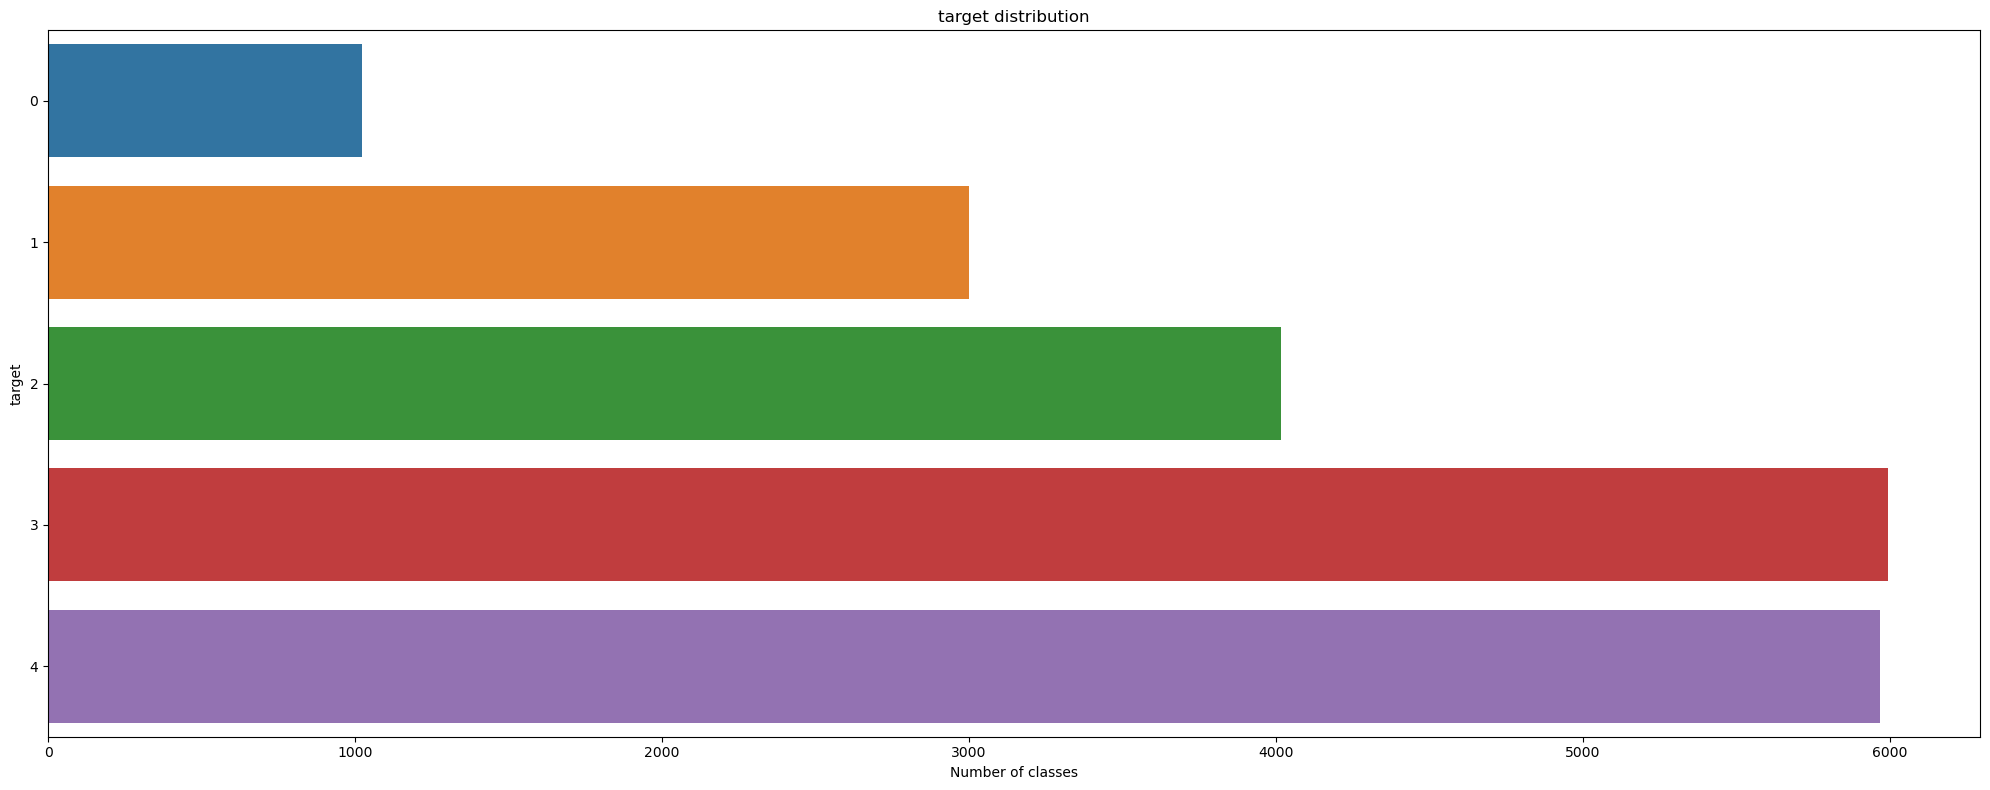

In [7]:
plt.figure(figsize=(20,8))
sns.countplot(y=data['target'])
plt.title('target distribution')
plt.xlabel('Number of classes')
plt.ylabel('target')
plt.tight_layout()
plt.show()

c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Density'>

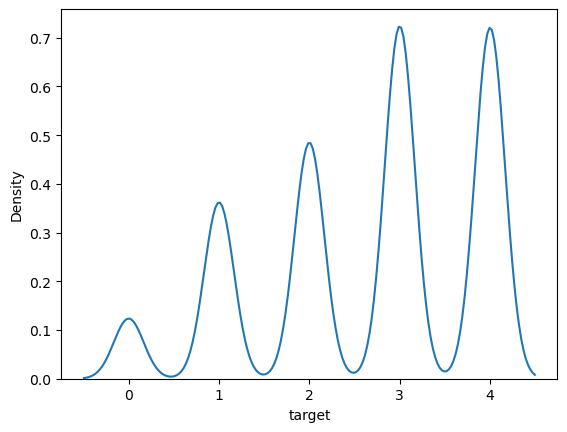

In [8]:
sns.kdeplot(data["target"])


 name of feature  age 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


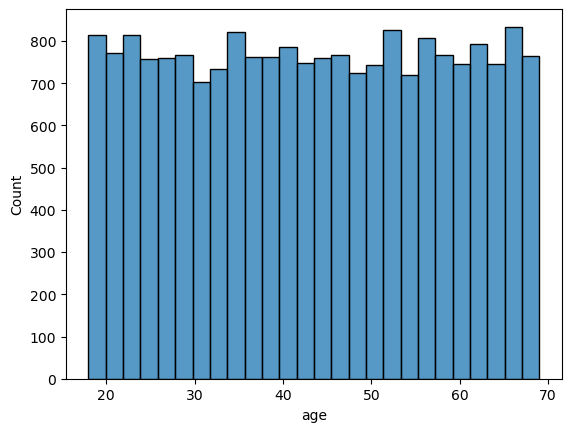


 name of feature  income 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


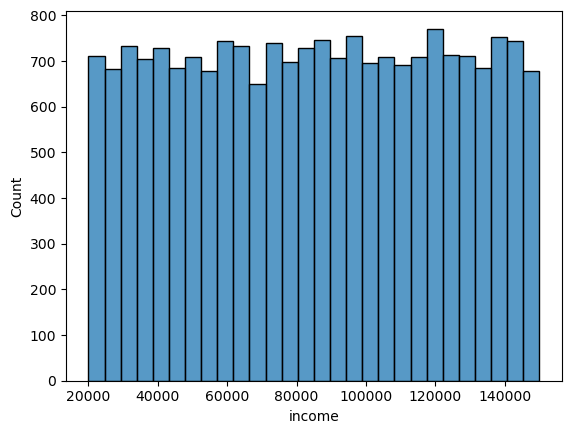


 name of feature  spending_score 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


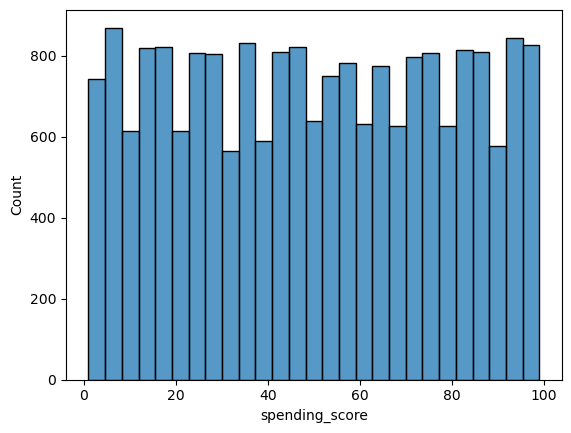


 name of feature  account_balance 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


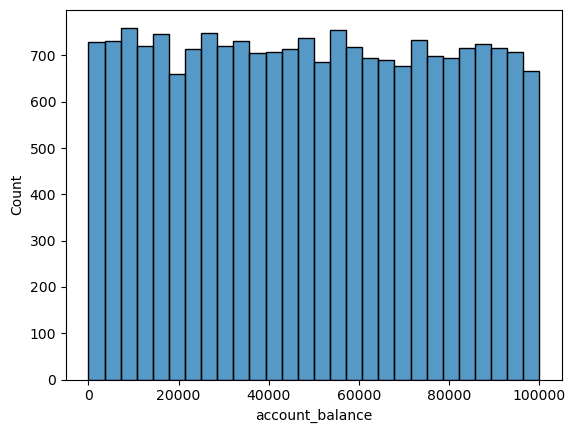


 name of feature  transaction_count 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


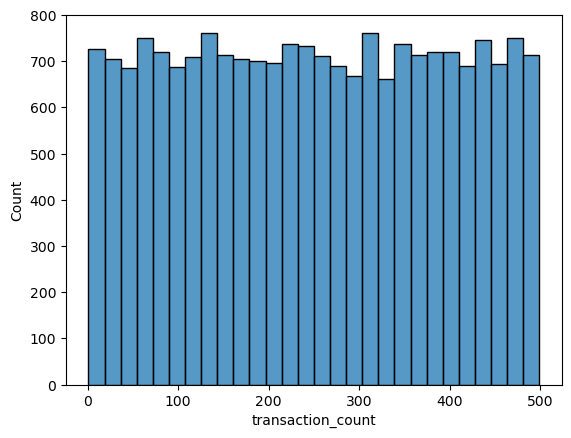


 name of feature  credit_score 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


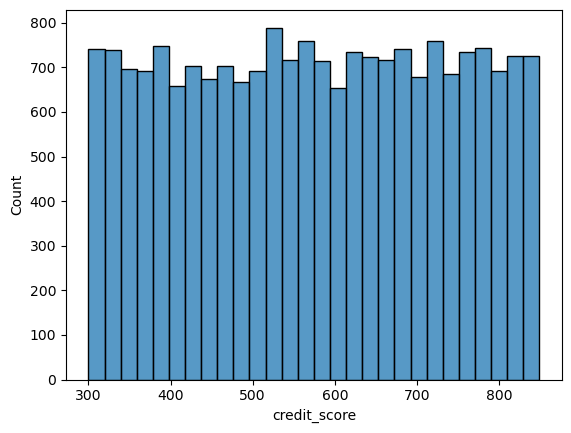


 name of feature  loyalty_score 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


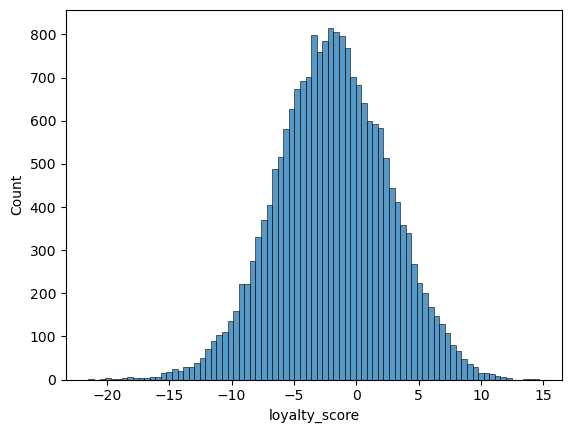


 name of feature  online_activity 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


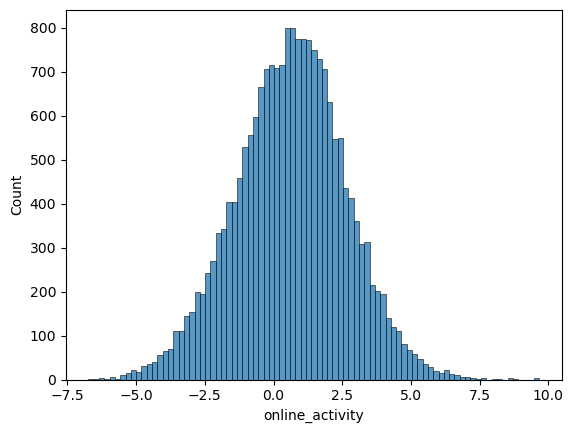


 name of feature  customer_service_calls 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


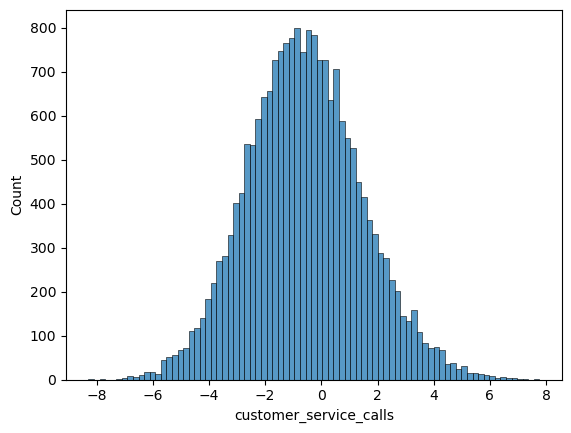


 name of feature  last_purchase_amount 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


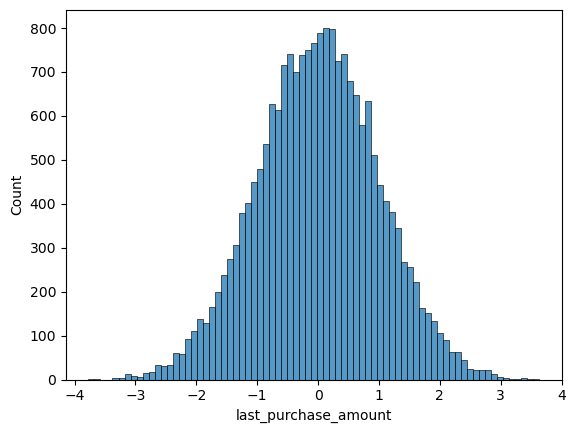


 name of feature  purchase_frequency 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


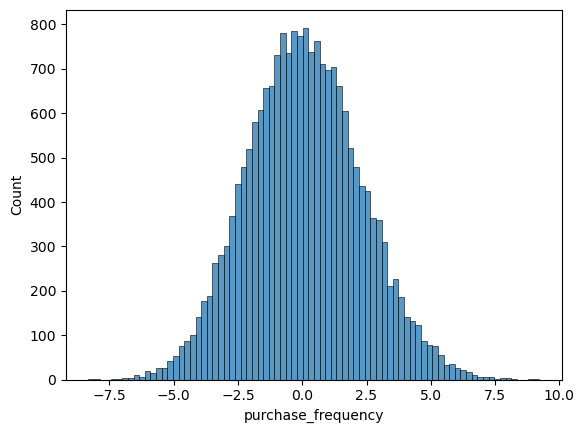


 name of feature  complaints_count 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


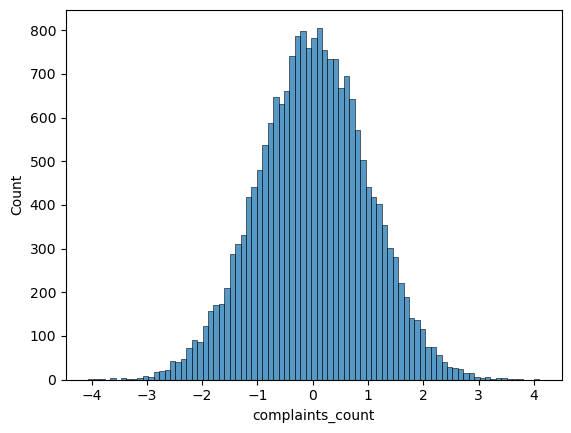


 name of feature  returns_count 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


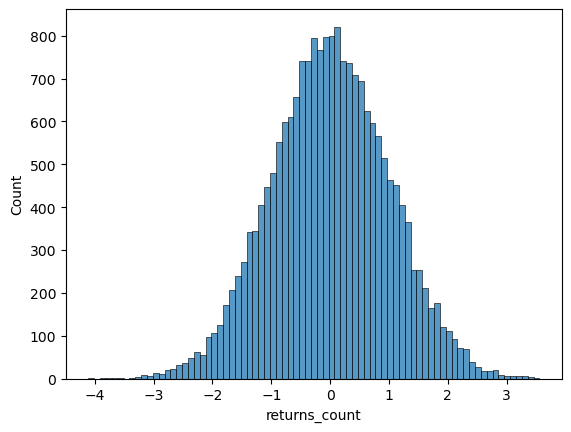


 name of feature  product_views 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


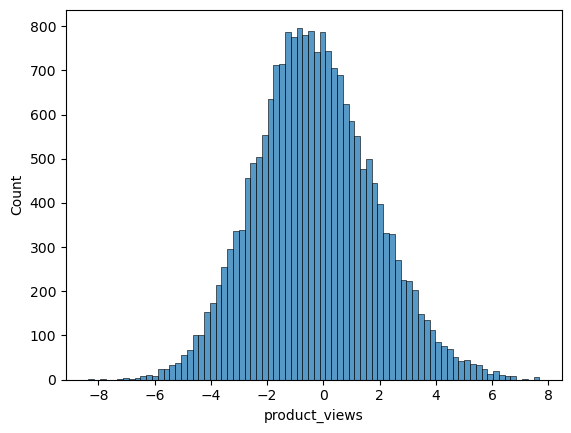


 name of feature  cart_abandonment_rate 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


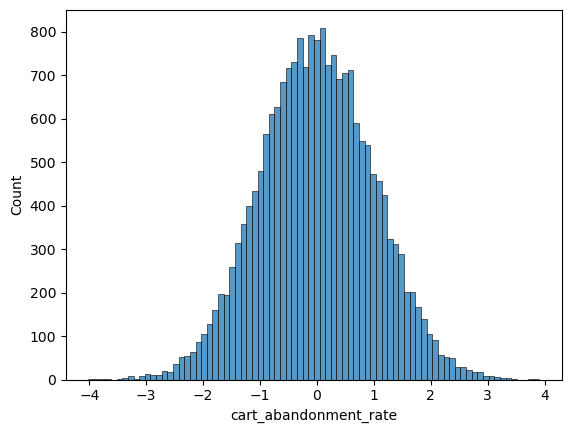

c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 name of feature  average_purchase_value 



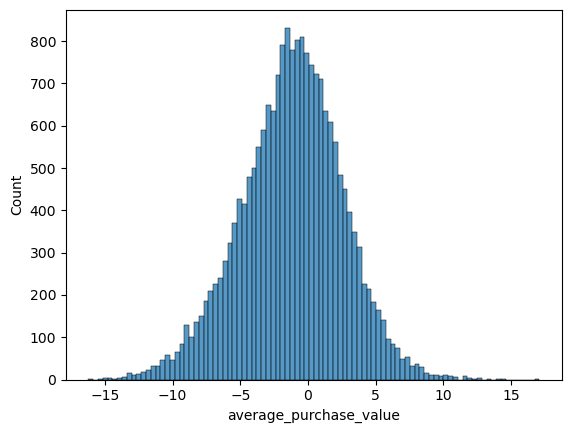


 name of feature  days_since_last_purchase 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


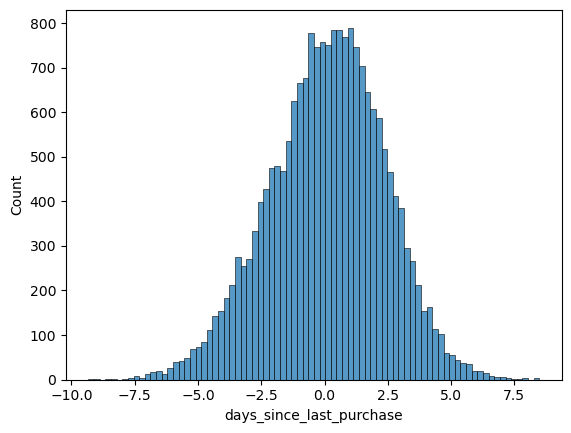


 name of feature  email_open_rate 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


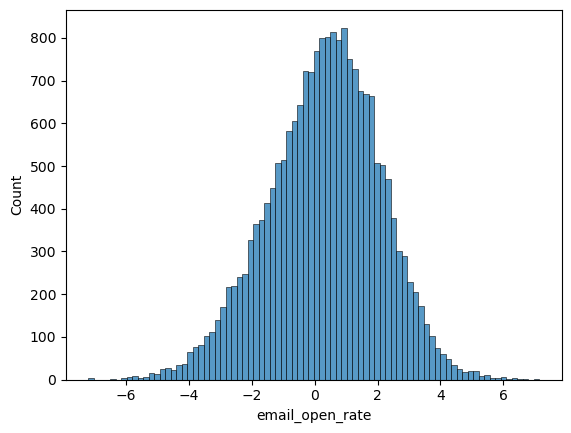


 name of feature  promotion_response_rate 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


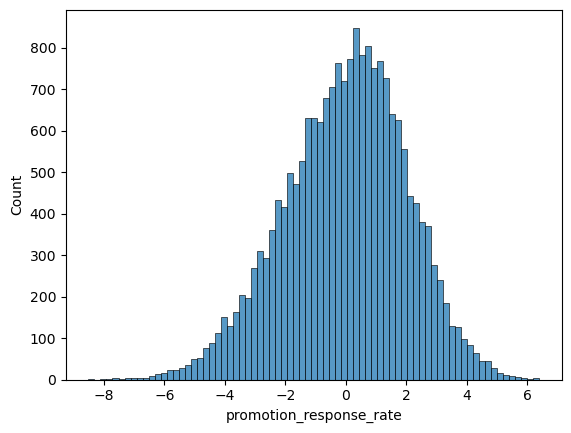

c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 name of feature  referral_count 



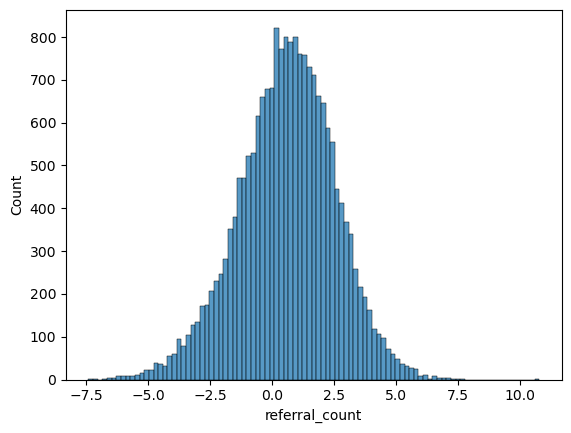


 name of feature  target 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


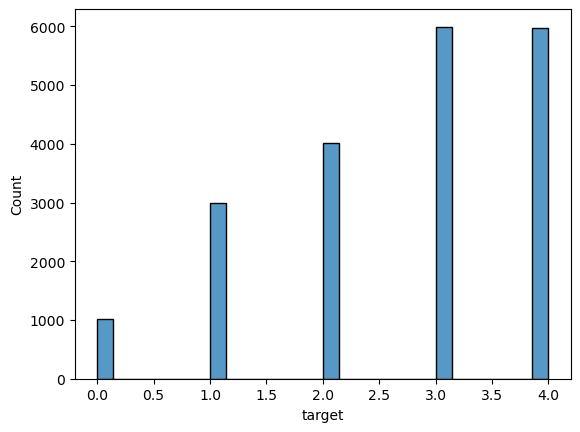

In [9]:
for i in data.columns:
    print("\n name of feature ", i,"\n" )
    sns.histplot(data[i])
    plt.show()


 name of feature  age 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


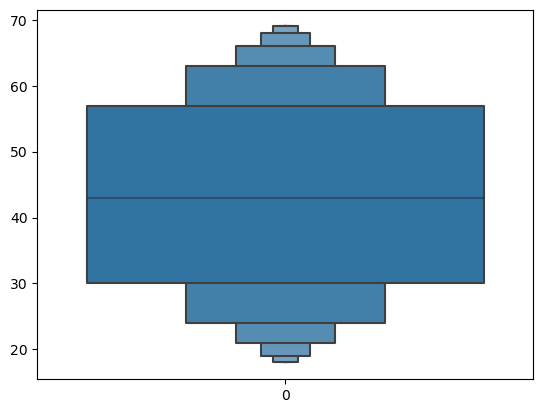


 name of feature  income 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


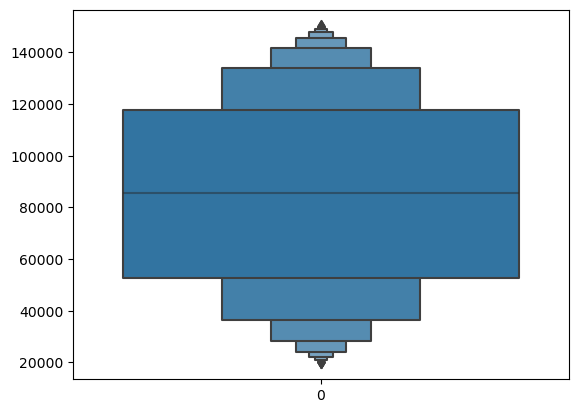

c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 name of feature  spending_score 



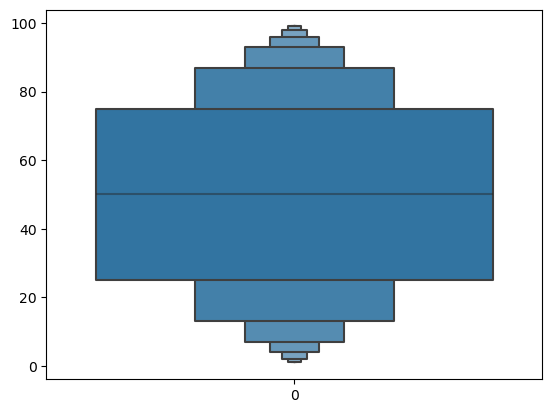


 name of feature  account_balance 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


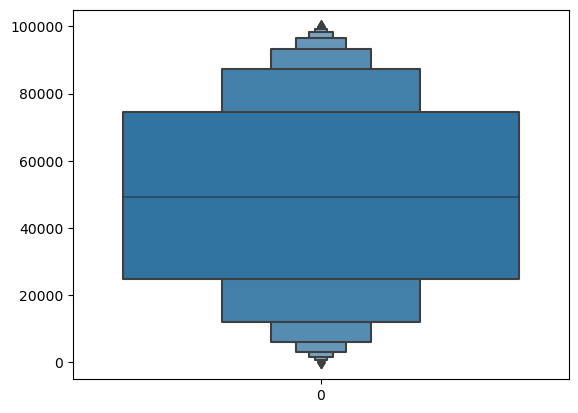


 name of feature  transaction_count 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


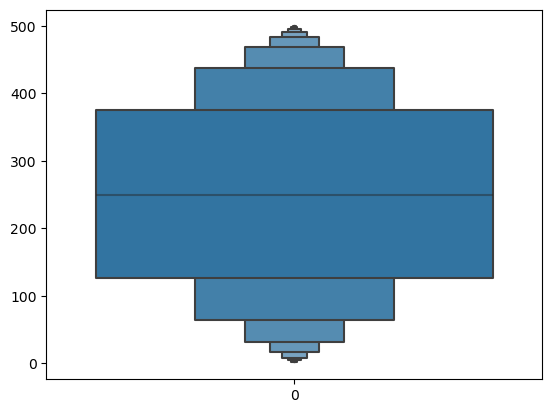


 name of feature  credit_score 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


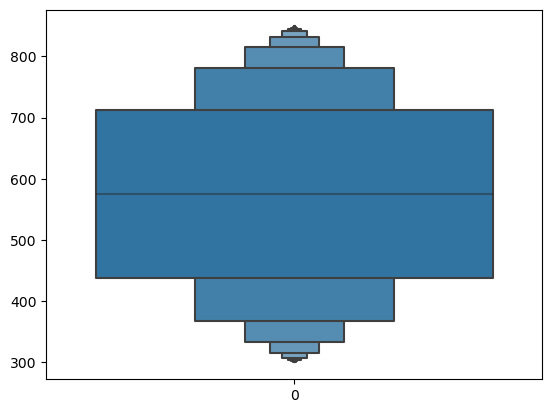


 name of feature  loyalty_score 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


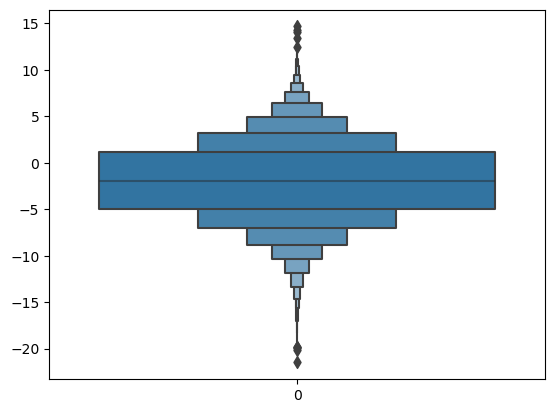


 name of feature  online_activity 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


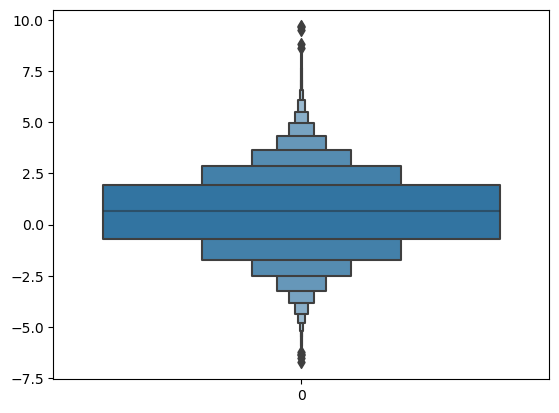


 name of feature  customer_service_calls 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


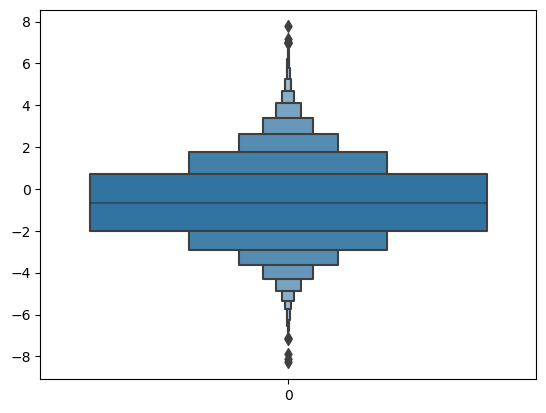


 name of feature  last_purchase_amount 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


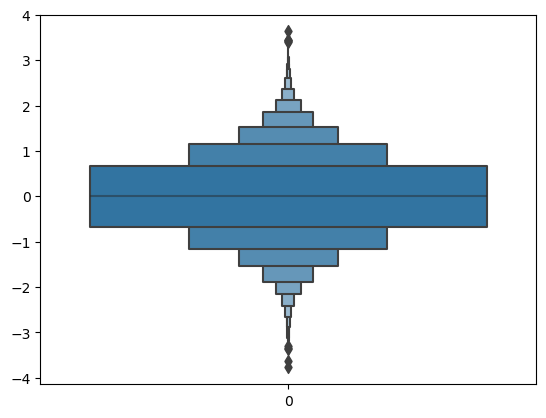

c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 name of feature  purchase_frequency 



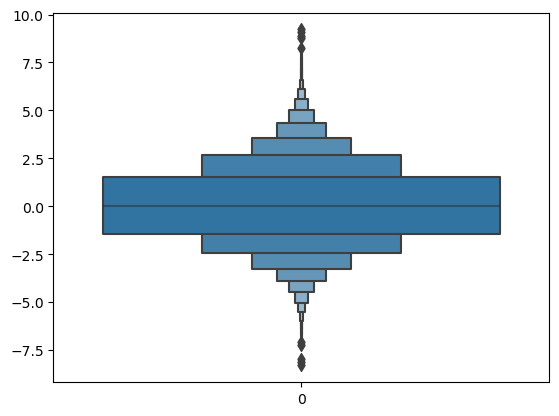


 name of feature  complaints_count 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


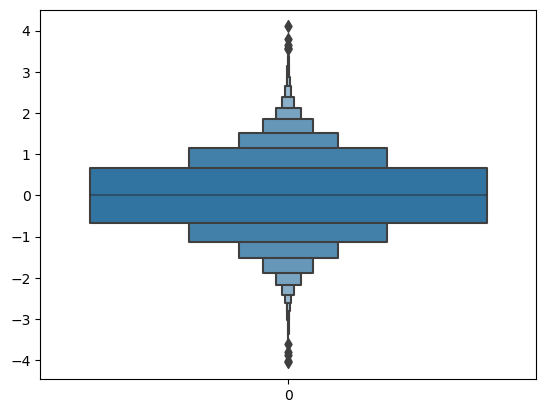


 name of feature  returns_count 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


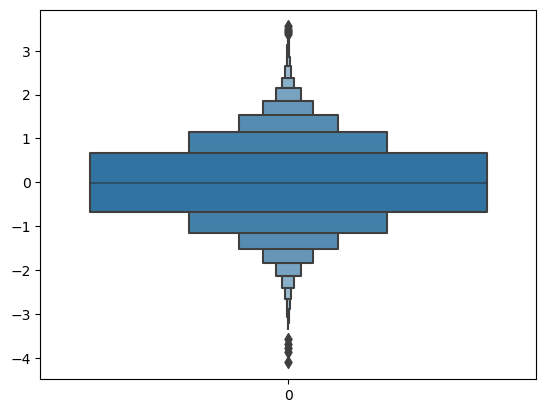


 name of feature  product_views 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


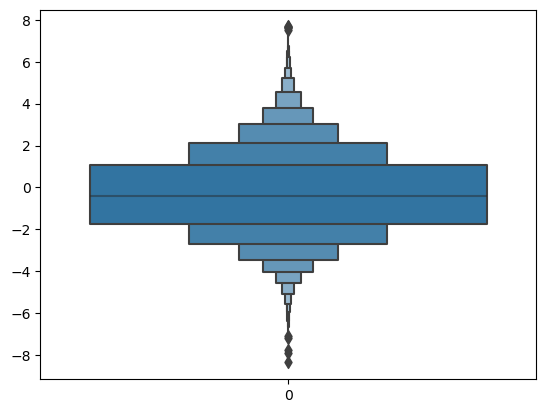

c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 name of feature  cart_abandonment_rate 



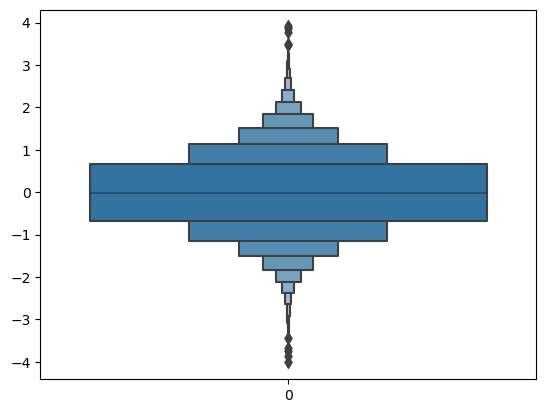


 name of feature  average_purchase_value 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


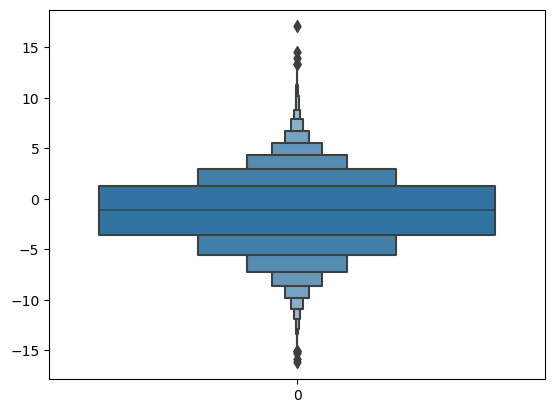


 name of feature  days_since_last_purchase 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


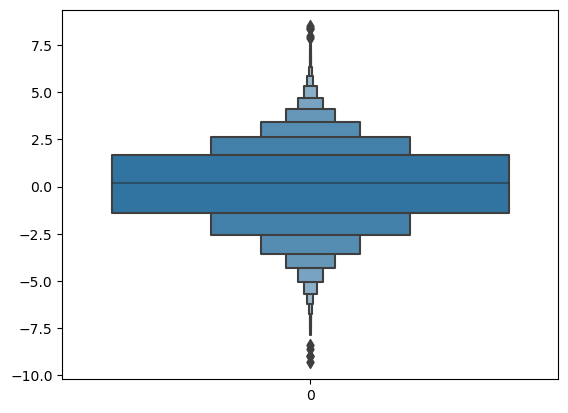


 name of feature  email_open_rate 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


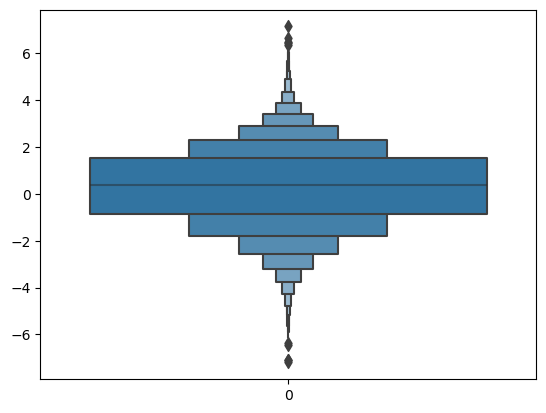

c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 name of feature  promotion_response_rate 



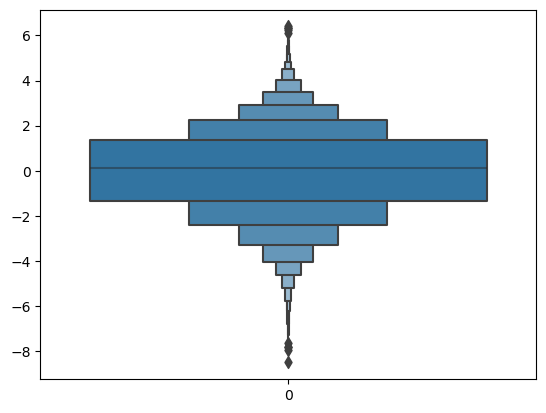


 name of feature  referral_count 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


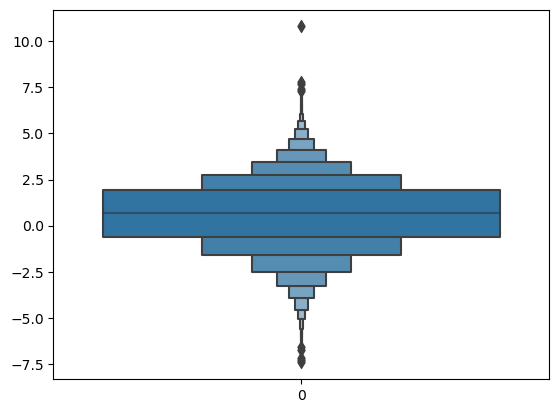


 name of feature  target 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


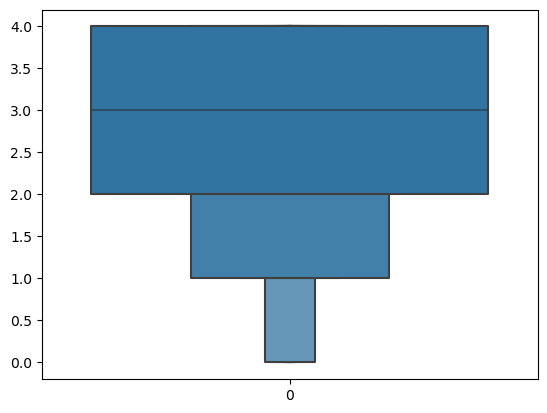

In [10]:

for i in data.columns:
    print("\n name of feature ", i,"\n" )
    sns.boxenplot(data[i])
    plt.show()

## svm

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler_mm=MinMaxScaler() #Normalization 
x = data
y=data['target']

In [46]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,train_size=0.2)


In [47]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=0)

Xsampled,ysampled=sm.fit_resample(xtrain,ytrain)

In [48]:

scaledn_xtrain=scaler_mm.fit_transform(Xsampled)
scaledn_xtest=scaler_mm.transform(xtest)


In [49]:
from sklearn.svm import SVC


In [50]:
model=SVC()
model.fit(scaledn_xtrain,ysampled)

SVC()

In [51]:
ypredict = model.predict(scaledn_xtest)

In [52]:
ypredict

array([3, 2, 2, ..., 3, 4, 4], dtype=int64)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(ypredict,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       781
           1       1.00      1.00      1.00      2380
           2       1.00      1.00      1.00      3176
           3       1.00      1.00      1.00      4834
           4       1.00      1.00      1.00      4829

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000



In [54]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ypredict,ytest))

[[ 781    0    0    0    0]
 [   0 2380    0    0    0]
 [   0    0 3176    0    0]
 [   0    0    0 4834    0]
 [   0    0    0    0 4829]]


## knn

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
model = KNeighborsClassifier()
    

In [60]:
model = KNeighborsClassifier(n_neighbors=3)

In [61]:
model.fit(scaledn_xtrain,ysampled)

KNeighborsClassifier(n_neighbors=3)

In [62]:
ypredict = model.predict(scaledn_xtest)

In [63]:
ypredict

array([3, 2, 2, ..., 3, 3, 4], dtype=int64)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(ypredict,ytest))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       896
           1       0.89      0.92      0.91      2320
           2       0.92      0.88      0.90      3340
           3       0.90      0.93      0.91      4692
           4       0.95      0.97      0.96      4752

    accuracy                           0.92     16000
   macro avg       0.92      0.90      0.91     16000
weighted avg       0.92      0.92      0.92     16000



In [65]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ypredict,ytest))

[[ 725  170    1    0    0]
 [  55 2127  134    4    0]
 [   1   82 2935  319    3]
 [   0    1  104 4348  239]
 [   0    0    2  163 4587]]


## DecisionTreeClassifier

In [66]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()

In [67]:
model.fit(scaledn_xtrain,ysampled)

DecisionTreeClassifier()

In [68]:
ypredict = model.predict(scaledn_xtest)

In [69]:
ypredict

array([3, 2, 2, ..., 3, 4, 4], dtype=int64)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(ypredict,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       781
           1       1.00      1.00      1.00      2380
           2       1.00      1.00      1.00      3176
           3       1.00      1.00      1.00      4834
           4       1.00      1.00      1.00      4829

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000



In [71]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ypredict,ytest))

[[ 781    0    0    0    0]
 [   0 2380    0    0    0]
 [   0    0 3176    0    0]
 [   0    0    0 4834    0]
 [   0    0    0    0 4829]]
